# Laporan Praktikum UTS Komputasi Statistika II

**Kelompok**: 4<br>
**Anggota**:<br>
1. Allisya Maharani Adinda Wibowo (21/478078/PA/20729)
2. Bryan Florentino Leo (21/473767/PA/20429)
3. Natasya Fatimah Salim (21/477164/PA/20634)

## *Web Scraping*

In [4]:
#Import library yang diperlukan
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
# Menginisialisasi list kosong untuk menyimpan hasil scraping
universities = []

In [ ]:
# Melakukan iterasi pada seluruh halaman di https://www.webometrics.info/en/asia/indonesia%20
for page in range(0, 35):
    url = f"https://www.webometrics.info/en/asia/indonesia%20?page={page}"
    response = requests.get(url)

    # Memeriksa apakah status response adalah 200 (dapat discraping)
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, "html.parser")

        # Menemukan tabel universitas pada halaman dan mengambil datanya
        table = soup.find("table", {"class": "sticky-enabled"})
        rows = table.find_all("tr")[1:]

        # Menyimpan data universitas pada list
        for row in rows:
            cells = row.find_all("td")
            rank = cells[0].text.strip()
            worldrank = cells[1].text.strip()
            name = cells[2].text.strip()
            impact = cells[4].text.strip()
            openness = cells[5].text.strip()
            excellence = cells[6].text.strip()

            universities.append({
                "Rank": rank,
                "World Rank": worldrank,
                "University": name,
                "Impact": impact,
                "Openness": openness,
                "Excellence": excellence
            })
    else:
        print(f"Failed to retrieve page {page}")

In [ ]:
#Mengonversi data menjadi data frame
univ = pd.DataFrame(universities)

In [ ]:
univ

,Rank,World Rank,University,Impact,Openness,Excellence
0,1,583,Universitas Indonesia,299,686,1126
1,2,686,Universitas Gadjah Mada,335,710,1389
2,3,853,Universitas Brawijaya,215,848,2239
3,4,897,IPB University / Bogor Agricultural University,405,720,1999
4,5,990,Universitas Airlangga,1023,977,1418
...,...,...,...,...,...,...
3457,3477,32230,STT Ekklesia Pontianak Tinggi Iman,32229,6553,7212
3458,3478,32230,Sekolah Tinggi Teologi Parakletos Tomohon,32229,6553,7212
3459,3479,32230,STT Paulus Jakarta,32229,6553,7212
3460,3480,32230,Sekolah Tinggi Teologi Pantekosta Jakarta,32229,6553,7212


### *Preprocessing* data

In [ ]:
#Menampilkan info data
univ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3462 entries, 0 to 3461
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        3462 non-null   object
 1   World Rank  3462 non-null   object
 2   University  3462 non-null   object
 3   Impact      3462 non-null   object
 4   Openness    3462 non-null   object
 5   Excellence  3462 non-null   object
dtypes: object(6)
memory usage: 162.4+ KB


In [ ]:
#Memperbaiki tipe data
univ.Rank = univ.Rank.astype(int)
univ["World Rank"] = univ["World Rank"].astype(int)
univ.Impact = univ.Impact.astype(int)
univ.Openness = univ.Openness.astype(int)
univ.Excellence = univ.Excellence.astype(int)

In [ ]:
#Mengecek adanya missing value
missing_data = pd.DataFrame({'total_missing': univ.isnull().sum(),
                             'perc_missing': (univ.isnull().sum()/12006)*100})
missing_data

,total_missing,perc_missing
Rank,0,0.0
World Rank,0,0.0
University,0,0.0
Impact,0,0.0
Openness,0,0.0
Excellence,0,0.0


In [ ]:
#Memeriksa adanya data duplikat
univ[univ.duplicated()]

,Rank,World Rank,University,Impact,Openness,Excellence


In [ ]:
#Mengetahui deskripsi numerik data
univ.describe()

,Rank,World Rank,Impact,Openness,Excellence
count,3462.000000,3462.000000,3462.000000,3462.000000,3462.000000
mean,1731.944541,23874.708550,23943.134893,6236.235991,7144.655690
std,1000.293546,8066.692124,8252.584750,889.228086,501.963973
min,1.000000,583.000000,193.000000,686.000000,1126.000000
25%,866.250000,19197.250000,19945.000000,6553.000000,7212.000000
50%,1731.500000,26801.000000,26802.000000,6553.000000,7212.000000
75%,2596.750000,30444.000000,30430.000000,6553.000000,7212.000000
max,3481.000000,32230.000000,32229.000000,6553.000000,7212.000000


Data ini sudah siap untuk dianalisis.

### Visualisasi data

In [ ]:
#Mengimpor module yang diperlukan
import matplotlib.pyplot as plt
import seaborn as sns

#### *Distribution plot*

*Distributiion plot* bertujuan untuk mengetahui distribusi data dari suatu variabel.

C:\Users\Bryan Florentino Leo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan Florentino Leo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bryan Florentino Leo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

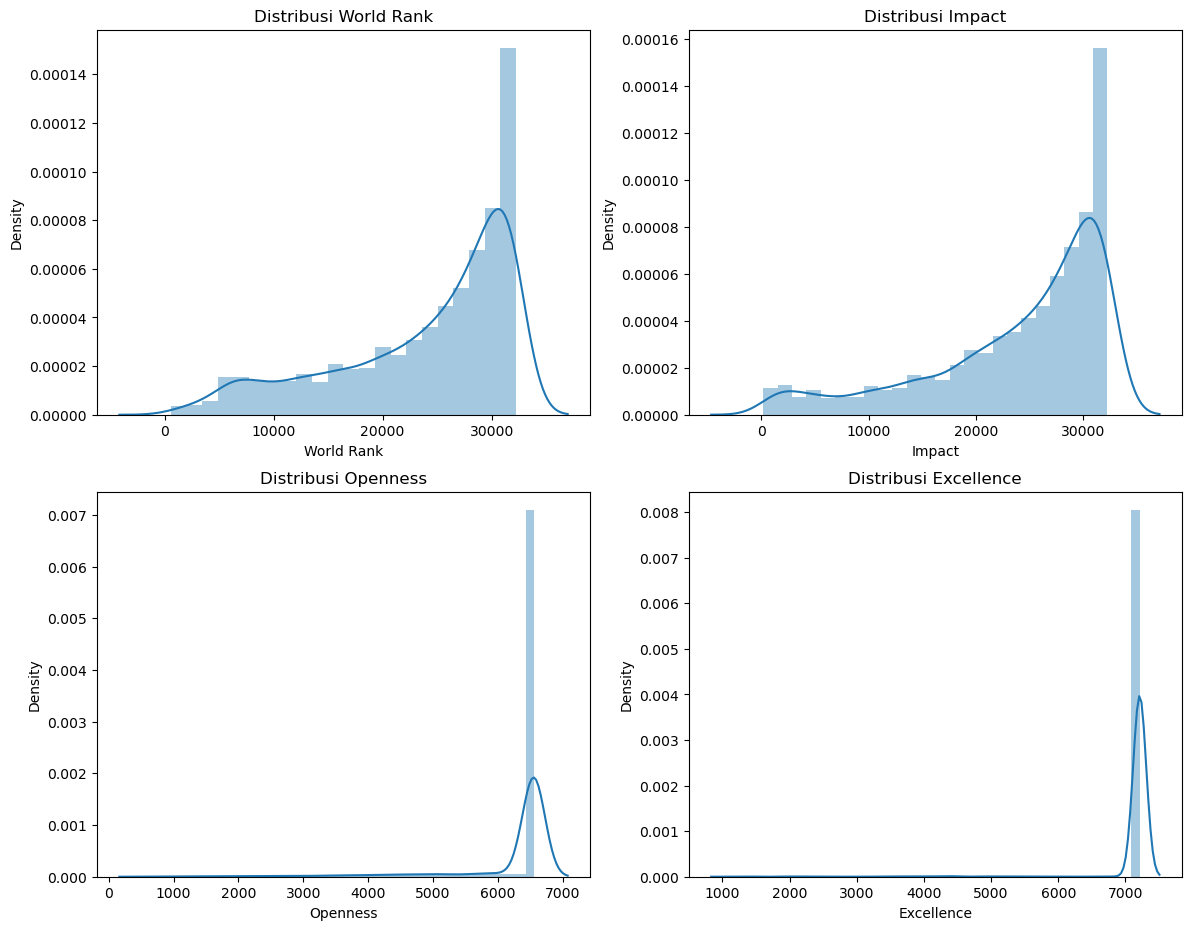

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 11))

#Distribution plot variabel 'World Rank'
sns.distplot(univ["World Rank"], ax = axs[0][0])
axs[0][0].set_title('Distribusi World Rank')

#Distribution plot variabel 'Impact'
sns.distplot(univ["Impact"], ax = axs[0][1])
axs[0][1].set_title('Distribusi Impact')

#Distribution plot variabel 'Openness'
sns.distplot(univ["Openness"], ax = axs[1][0])
axs[1][0].set_title('Distribusi Openness')

#Distribution plot variabel 'Excellence'
sns.distplot(univ["Excellence"], ax = axs[1][1])
axs[1][1].set_title('Distribusi Excellence')

plt.show()

#### *Boxplot* (Diagram kotak dan titik)

*Boxplot* dibuat untuk melihat distribusi variabel secara lebih mendetail dan adanya pencilan (*outlier*).

Text(0.5, 1.0, 'Boxplot Excellence')

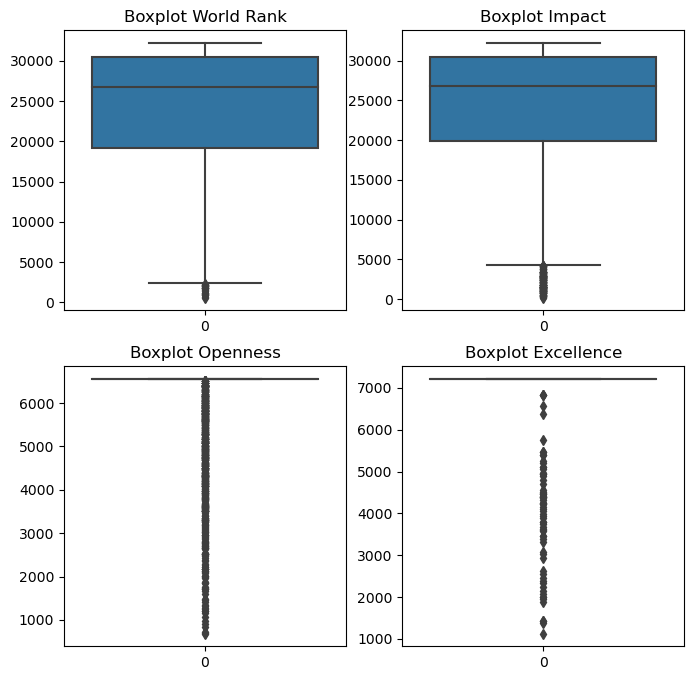

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

#Boxplot variabel 'World Rank'
sns.boxplot(data = univ["World Rank"], ax = axs[0][0])
axs[0][0].set_title('Boxplot World Rank')

#Boxplot variabel 'Impact'
sns.boxplot(data = univ["Impact"], ax = axs[0][1])
axs[0][1].set_title('Boxplot Impact')

#Boxplot variabel 'Openness'
sns.boxplot(data = univ["Openness"], ax = axs[1][0])
axs[1][0].set_title('Boxplot Openness')

#Boxplot variabel 'Excellence'
sns.boxplot(data = univ["Excellence"], ax = axs[1][1])
axs[1][1].set_title('Boxplot Excellence')

#### *Heatmap* korelasi

*Heatmap* korelasi adalah salah satu cara memvisualisasikan nilai kekuatan hubungan antarvariabel.

Text(0.5, 1.0, 'Heatmap Korelasi')

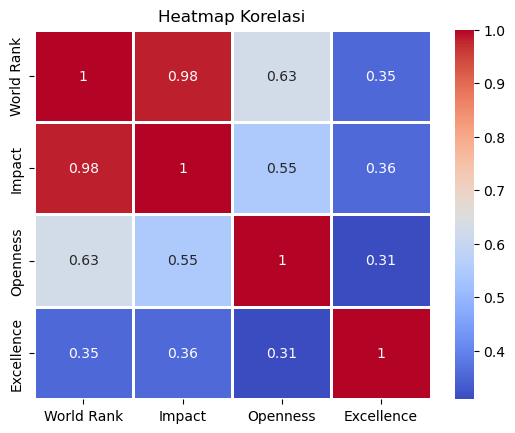

In [ ]:
univ1 = univ[["World Rank", "Impact", "Openness", "Excellence"]]
sns.heatmap(univ1.corr(), cmap = 'coolwarm', annot = True, linecolor = 'white', linewidths = 1).set_title("Heatmap Korelasi")

#### *Bar chart* (Diagram batang)

Diagram batang dibuat untuk mengetahui jumlah data dari setiap kategori dalam suatu variabel kategorik.

In [ ]:
#Membuat kolom baru, World Rank Category
WRC = []
for i in range(len(univ)):
    if univ["World Rank"][i] <= 1000:
        WRC.append("Top 1.000")
    elif univ["World Rank"][i] > 1000 and univ["World Rank"][i] <= 5000:
        WRC.append("1.000 - 5.000")
    elif univ["World Rank"][i] > 5000 and univ["World Rank"][i] <= 10000:
        WRC.append("5.000 - 10.000")
    else:
        WRC.append("10.000+")
 
univ["World Rank Category"] = WRC

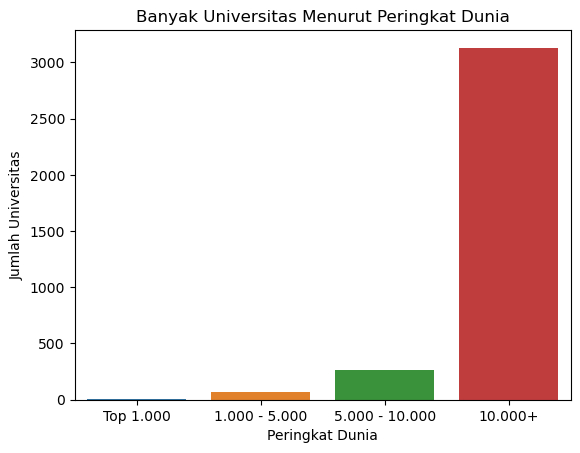

In [ ]:
#Bar chart dari variabel 'World Rank Category'
sns.countplot(data = univ, x = 'World Rank Category')
plt.title('Banyak Universitas Menurut Peringkat Dunia')
plt.xlabel('Peringkat Dunia')
plt.ylabel('Jumlah Universitas')
plt.show()

## *Web Scraping* dengan API

In [21]:
#Membuat array untuk menyimpan list produk
product = []

In [22]:
#melakukan perulangan untuk mengakses data produk dari halaman 1 hingga halaman 7
for i in range (1, 8):
    page = i
    url =  'https://www.sephora.co.id/api/v2.3/products?filter[category]=makeup%2Flips&page[number]={}&page[size]=36&sort=sales&include=variants,brand,featured_ad'.format(page)
    response = requests.get(url).json()
    data = response['data']
    
    #Menyiapkan array kosong untuk menyimpan atribut yang ada di dalam segmen data
    at = [] 
    
    #Melakukan perulangan untuk mengakses atribut yang ada di dalam segmen data
    for p in data:
        #Menginputkan setiap atribut yang ada di dalam segmen data
        at.append(p['attributes'])
    
    #Melakukan perulangan untuk mengakses keterangan produk yang ada di dalam atribut
    for t in at:
        #Mengambil data-data keterangan produk yang diperlukan dari website
        nama = t['name']
        harga = t['price']
        rating = t['rating']
        review = t['reviews-count']
        varian = t['variants-count']
        isi = t['heading']
        if t['sold-out'] == True:
            t['sold-out'] = 'Sold-Out'
        elif t['sold-out'] == False:
            t['sold-out'] = 'Available'
        keterangan = t['sold-out']
        if t['under-sale'] == True:
            t['under-sale'] = 'Sale'
        elif t['under-sale'] == False:
            t['under-sale'] = 'Normal'
        price_info = t['under-sale'] 
        
        #Menginputkan setiap keterangan produk ke dalam array 'product'
        product.append((nama, harga, rating, review, varian, isi, price_info))
        
        #Membuat dataframe untuk setiap produk 
        prod = pd.DataFrame(product, columns=['nama', 'harga', 'rating', 'review', 'banyak varian', 'isi', 'price info'])

In [23]:
#Menampilkan dataframe
prod

,nama,harga,rating,review,banyak varian,isi,price info
0,Soft Pinch Tinted Lip Oil,145000,4.7,846,8,3ml,Normal
1,Lip Soufflé Matte Lip Cream,145000,4.4,1979,15,3.9ml,Normal
2,Stay Vulnerable Glossy Lip Balm,145000,4.7,1140,5,3.8ml,Normal
3,Poutsicle Hydrating Lip Stain,182000,4.4,791,4,None,Normal
4,Benetint Cheek & Lip Tint,130000,4.2,1271,1,,Normal
...,...,...,...,...,...,...,...
247,L'Absolu Lacquer Liquid Lipstick X Chiara Ferr...,199955,4.0,4,3,None,Normal
248,Love Moi Pink Lip Balm,120000,4.3,11,1,,Normal
249,Be Mine Beauty Makeup Set,239000,4.6,14,1,None,Normal
250,Watermelon Burst Hydrating Lip Oil,101000,4.0,79,1,10ml,Normal


### *Preprocessing* data

In [24]:
#Menentukan apakah tipe data sudah sesuai atau belum
prod.dtypes

nama              object
harga              int64
rating           float64
review             int64
banyak varian      int64
isi               object
price info        object
dtype: object

In [25]:
#Mengecek apakah terdapat missing value pada data
print(prod.isna().sum())

nama              0
harga             0
rating            0
review            0
banyak varian     0
isi              44
price info        0
dtype: int64


In [26]:
#Dikarenakan kita tidak akan menggunakan variabel 'isi' dan variabel ini mengandung banyak missing value, maka variabel ini akan dihapus
prod = prod.drop('isi', axis = 1)
prod

,nama,harga,rating,review,banyak varian,price info
0,Soft Pinch Tinted Lip Oil,145000,4.7,846,8,Normal
1,Lip Soufflé Matte Lip Cream,145000,4.4,1979,15,Normal
2,Stay Vulnerable Glossy Lip Balm,145000,4.7,1140,5,Normal
3,Poutsicle Hydrating Lip Stain,182000,4.4,791,4,Normal
4,Benetint Cheek & Lip Tint,130000,4.2,1271,1,Normal
...,...,...,...,...,...,...
247,L'Absolu Lacquer Liquid Lipstick X Chiara Ferr...,199955,4.0,4,3,Normal
248,Love Moi Pink Lip Balm,120000,4.3,11,1,Normal
249,Be Mine Beauty Makeup Set,239000,4.6,14,1,Normal
250,Watermelon Burst Hydrating Lip Oil,101000,4.0,79,1,Normal


In [27]:
#Memeriksa adanya data duplikat
prod[prod.duplicated()]

,nama,harga,rating,review,banyak varian,price info
180,Allure Shine Lustrous Lip Plumper,225000,3.8,12,3,Normal
181,Squalane + Rose Vegan Lip Balm,193000,3.9,284,1,Normal
182,Aroma Lipstick,125000,4.0,2,7,Normal


In [28]:
#Menghapus data duplikat
prod.drop_duplicates(inplace=True)

Data ini sudah siap untuk dianalisis.

### Visualisasi data

#### Histogram

Histogram dibuat untuk melihat distribusi data dari suatu variabel.

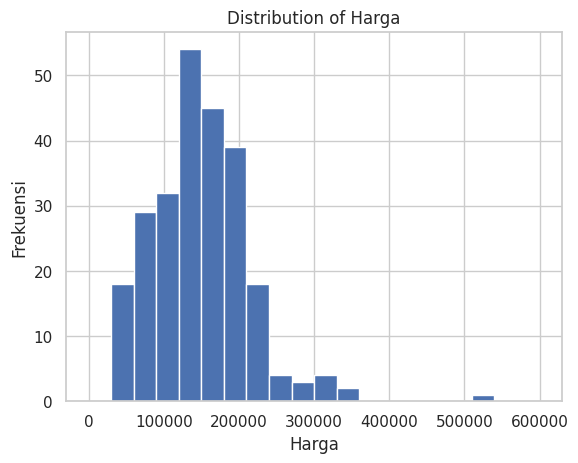

In [43]:
#Import library yang digunakan
import matplotlib.pyplot as plt

#Membuat histogram untuk variabel "harga" yang berkisar antara 0-600.000
plt.hist(prod['harga'], bins=20, range=[0, 600000])

#Menambahkan judul plot dan nama untuk sumbu x dan y
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.title('Distribution of Harga')

#Menampilkan histogram
plt.show()

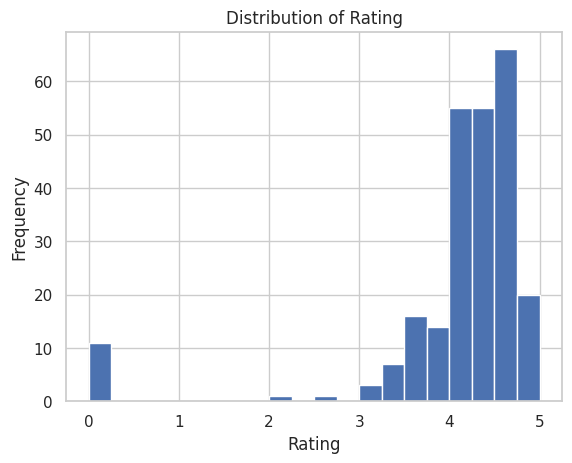

In [44]:
#Import library yang digunakan
import matplotlib.pyplot as plt

#Membuat histogram untuk variabel "rating" yang berkisar antara 0-5
plt.hist(prod['rating'], bins=20, range=[0, 5])

#Menambahkan judul plot dan nama untuk sumbu x dan y
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Rating')

#Menampilkan histogram
plt.show()

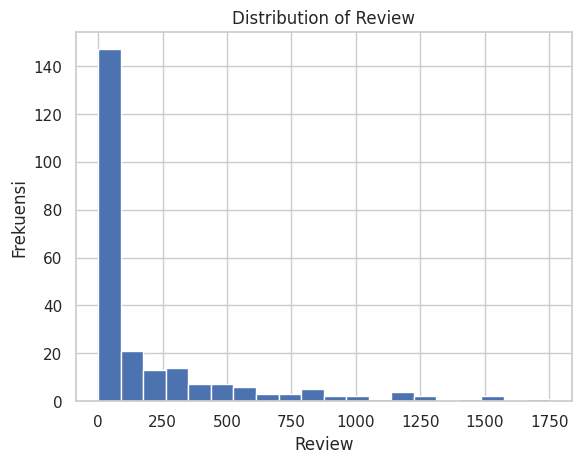

In [45]:
#Import library yang digunakan
import matplotlib.pyplot as plt

#Membuat histogram untuk variabel "harga" yang berkisar antara 0-5.000
plt.hist(prod['review'], bins=20, range=[0, 1750])

#Menambahkan judul plot dan nama untuk sumbu x dan y
plt.xlabel('Review')
plt.ylabel('Frekuensi')
plt.title('Distribution of Review')

#Menampilkan histogram
plt.show()

#### *Boxplot* (Diagram kotak dan titik)

*Boxplot* dibuat untuk melihat distribusi variabel secara lebih mendetail dan adanya pencilan (*outlier*).

Quartile 1:  105000.0
Quartile 2:  145000.0
Quartile 3:  188000.0
Minimum value:  31200
Maximum value:  533000


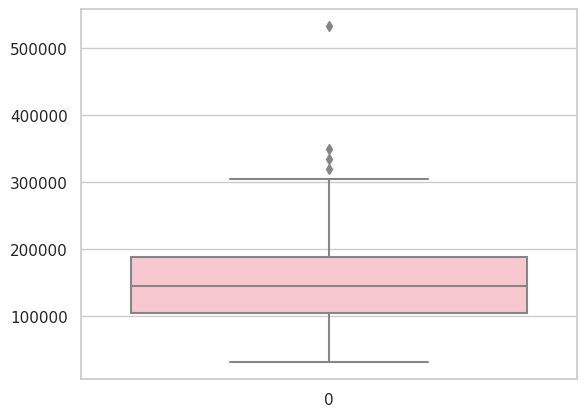

In [36]:
#Ingin dibuat boxplot untuk melihat distribusi variabel 'harga' secara lebih detail, serta melihat adanya pencilan atau outlier
#Import library yang digunakan
import seaborn as sns
import pandas as pd

#Membuat boxplot
sns.set(style='whitegrid')
ax = sns.boxplot(data=prod['harga'], color="pink")

#Menampilkan q1, q2, q3, min, dan max
q1, q2, q3 = prod['harga'].quantile([0.25, 0.5, 0.75])
harga_min = prod['harga'].min()
harga_max = prod['harga'].max()
print("Quartile 1: ", q1)
print("Quartile 2: ", q2)
print("Quartile 3: ", q3)
print("Minimum value: ", harga_min)
print("Maximum value: ", harga_max)

#Menampilkan boxplot
plt.show()

Quartile 1:  4.0
Quartile 2:  4.3
Quartile 3:  4.5
Minimum value:  0.0
Maximum value:  5.0


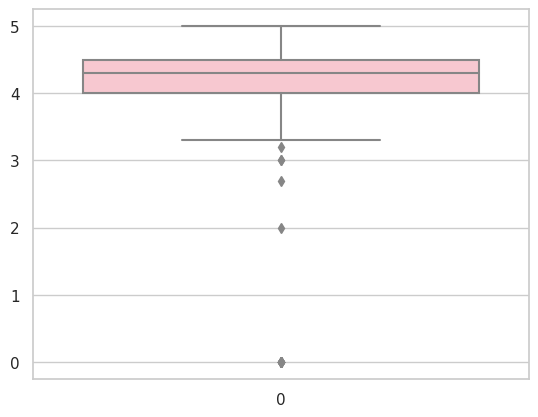

In [37]:
#Ingin dibuat boxplot untuk melihat distribusi variabel 'rating' secara lebih detail, serta melihat adanya pencilan atau outlier
#Import library yang digunakan
import seaborn as sns
import pandas as pd

#Membuat boxplot
sns.set(style='whitegrid')
ax = sns.boxplot(data=prod['rating'], color="pink")

#Menampilkan q1, q2, q3, min, dan max
q1, q2, q3 = prod['rating'].quantile([0.25, 0.5, 0.75])
rating_min = prod['rating'].min()
rating_max = prod['rating'].max()
print("Quartile 1: ", q1)
print("Quartile 2: ", q2)
print("Quartile 3: ", q3)
print("Minimum value: ", rating_min)
print("Maximum value: ", rating_max)

#Menampilkan boxplot
plt.show()

Quartile 1:  8.0
Quartile 2:  46.0
Quartile 3:  298.0
Minimum value:  0
Maximum value:  16058


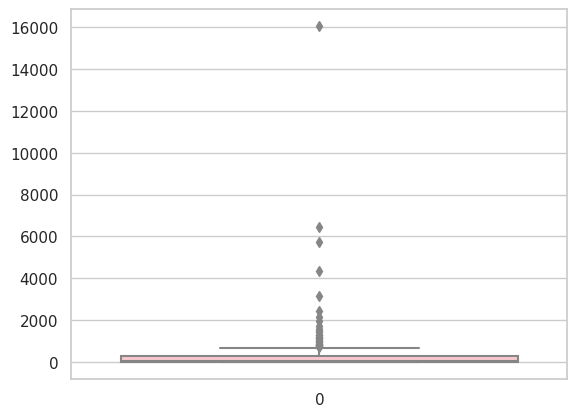

In [38]:
#Ingin dibuat boxplot untuk melihat distribusi variabel 'review' secara lebih detail, serta melihat adanya pencilan atau outlier
#Import library yang digunakan
import seaborn as sns
import pandas as pd

#Membuat boxplot
sns.set(style='whitegrid')
ax = sns.boxplot(data=prod['review'], color="pink")

#Menampilkan q1, q2, q3, min, dan max
q1, q2, q3 = prod['review'].quantile([0.25, 0.5, 0.75])
review_min = prod['review'].min()
review_max = prod['review'].max()
print("Quartile 1: ", q1)
print("Quartile 2: ", q2)
print("Quartile 3: ", q3)
print("Minimum value: ", review_min)
print("Maximum value: ", review_max)

#Menampilkan boxplot
plt.show()

#### *Scatterplot* (Diagram pencar)

*Scatterplot* dibuat untuk mengetahui hubungan antara dua variabel.

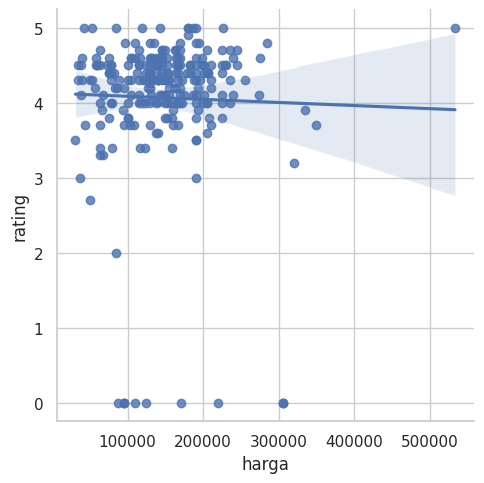

In [39]:
#Ingin dibuat scatter plot untuk mengetahui hubungan antara variabel 'harga' dengan 'rating'
#Import library yang akan digunakan
import seaborn as sns

sns.lmplot(x='harga', y='rating', data=prod)

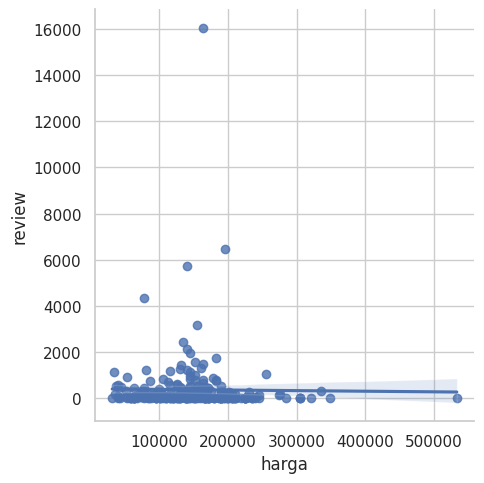

In [40]:
#Ingin dibuat scatter plot untuk mengetahui hubungan antara variabel 'harga' dengan 'review'
#Import library yang akan digunakan
import seaborn as sns

sns.lmplot(x='harga', y='review', data=prod)

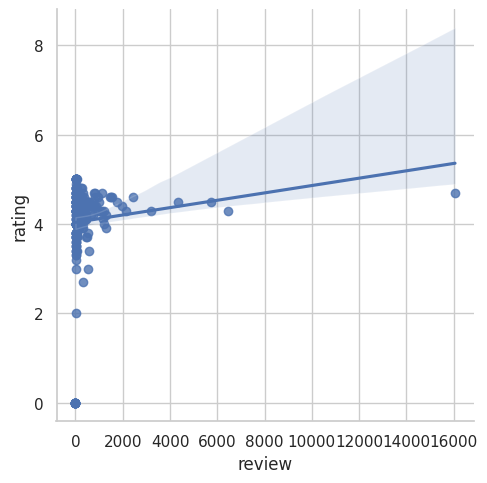

In [41]:
#Ingin dibuat scatter plot untuk mengetahui hubungan antara variabel 'review' dengan 'rating'
#Import library yang akan digunakan
import seaborn as sns

sns.lmplot(x='review', y='rating', data=prod)

#### *Bar chart* (Diagram batang)

Diagram batang dibuat untuk mengetahui jumlah data dari setiap kategori dalam suatu variabel kategorik.

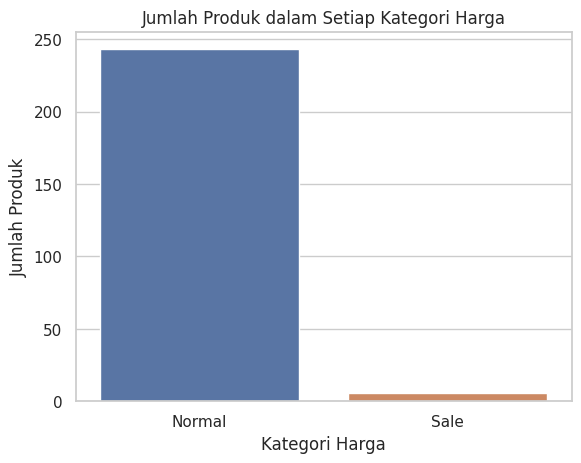

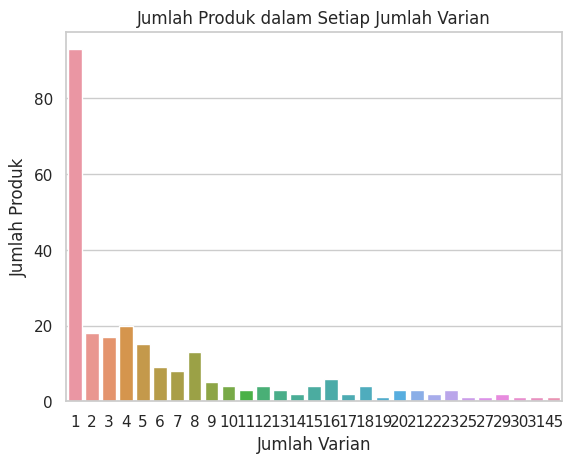

In [42]:
#Bar chart dari variabel 'price info'
sns.countplot(data = prod, x = 'price info')
plt.title('Jumlah Produk dalam Setiap Kategori Harga')
plt.xlabel('Kategori Harga')
plt.ylabel('Jumlah Produk')
plt.show()

#Bar chart dari variabel 'banyak varian'
sns.countplot(data = prod, x = 'banyak varian')
plt.title('Jumlah Produk dalam Setiap Jumlah Varian')
plt.xlabel('Jumlah Varian')
plt.ylabel('Jumlah Produk')
plt.show()